# Keras DNN으로 집값 예측하기

# 1. 패키지 수입 및 하이퍼 파라미터 지정

파이썬 패키지 수입(선언) - import, from ? import ?, import ? as ?(확장)

In [1]:
# 데이터 조작 및 분석 라이브러리 패키지(판다스)
import pandas as pd
# 주 패키지인 맷플롯립은 데이터를 차트나 플롯으로 그려주는 라이브러리 패키지(데이터 시각화)
# 서브 패키지인 pyplot은 수치 해석 시각화(MATLAB 비슷) 명령 제공(관례로 alias는 plt로 사용)
import matplotlib.pyplot as plt
# 데이터 분포 시각화
# seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
import seaborn as sns
# 시간 다루기
from time import time

# keras는 신경망 라이브러리 패키지
# keras의 Sequential(순차) 모델 함수
from keras.models import Sequential
# 일반적인 뉴럴네트워크의 densly(fully)-connected 레이어 함수
# Dense()를 이용해 전결합층 생성 가능(N-N 연결)
from keras.layers import Dense
# 데이터 모델링 전 반드시 거쳐야하는 스케일링 과정
# 머신 러닝 라이브러리 Scikit-Learn(사이킷런)에서 제공하는 스케일러 중 기본 스케일러, 평균과 표준편차 사용
# StandardScaler는 각 feature의 평균을 0, 분산을 1로 변경(z-점수 정규화), 모든 특성들이 같은 스케일을 갖음
from sklearn.preprocessing import StandardScaler
# 학습/테스트 데이터 세트 분리 함수
from sklearn.model_selection import train_test_split

하이퍼 파라미터 - 학습 프로세서를 제어하는 값을 갖는 매개변수

In [2]:
# 은닉층의 개수
MY_HIDDEN = 100
# 전체(총) dataset의 학습 횟수 (feed forward + feed backward)
MY_EPOCH = 70
# iteration(1회 학습)에 dataset을 몇 개의 BATCH로 나누어 학습하는가.
MY_BATCH = 13


# 2. 데이터 불러 오기 및 전처리

데이터 파일 읽기
결과는 pandas의 데이터 프레임 형식(2차원 행렬)

In [3]:
heading = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', "DIS", 'RAD', 'TAX', 'PTRATIO', "LSTAT", 'MEDV']
# 가공되지 않은 측정 자료
raw = pd.read_csv('/content/drive/MyDrive/data/housing.csv')

데이터 원본 출력

In [4]:
pd.set_option('max_columns', None)
print("원본 데이터 샘플 10개")
# 데이터 미리보기(head)
print(raw.head(10))

print("\n원본 데이터 통계")
# 다양한 통계량 요약
print(raw.describe())

원본 데이터 샘플 10개
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33 

데이터 시각화(박스 플롯)

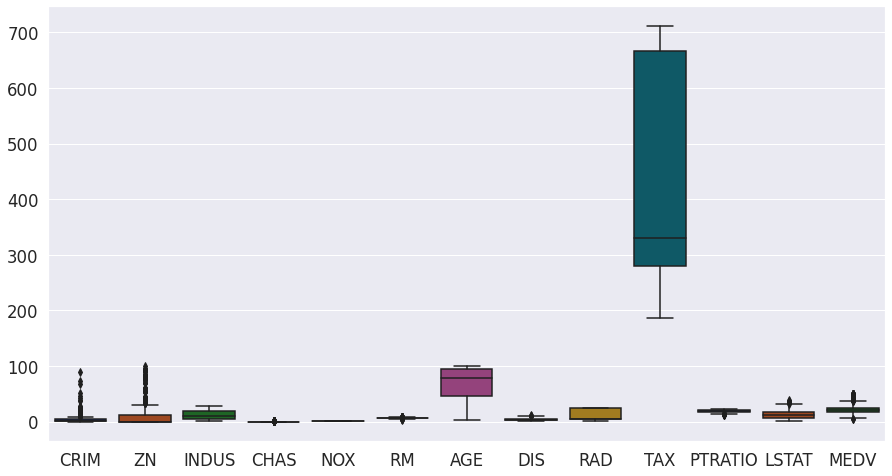

In [5]:
# 박스의 크기 설정
plt.figure(figsize=(15, 8))
sns.set(font_scale=1.5)
sns.boxplot(data=raw, palette='dark')

Z-점수 정규화

결과는 numpy의 n-차원 행렬 형식

In [6]:
scaler = StandardScaler()
Z_data = scaler.fit_transform(raw)

# numpy에서 pandas로 전환
# header 정보 복구 필요
Z_data = pd.DataFrame(Z_data, 
                      columns=heading)

정규화 된 데이터 출력

In [7]:
print('정규화 된 데이터 샘플10개')
print(Z_data.head(10))

print('\n정규화 된 데이터 통계')
print(Z_data.describe())

정규화 된 데이터 샘플10개
       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   
5 -0.417044 -0.487722 -1.306878 -0.272599 -0.835284  0.207096 -0.351157   
6 -0.410243  0.048772 -0.476654 -0.272599 -0.265154 -0.388411 -0.070229   
7 -0.403696  0.048772 -0.476654 -0.272599 -0.265154 -0.160466  0.978808   
8 -0.395935  0.048772 -0.476654 -0.272599 -0.265154 -0.931206  1.117494   
9 -0.400729  0.048772 -0.476654 -0.272599 -0.265154 -0.399808  0.616090   

        DIS       RAD       TAX   PTRATIO     LSTAT      MEDV  
0  0.140214 -0.982843 -0.666608 -1.459000 -1.075562  0.159686  
1  0.557160 -0.867883 -0.98732

상자 그림 출력

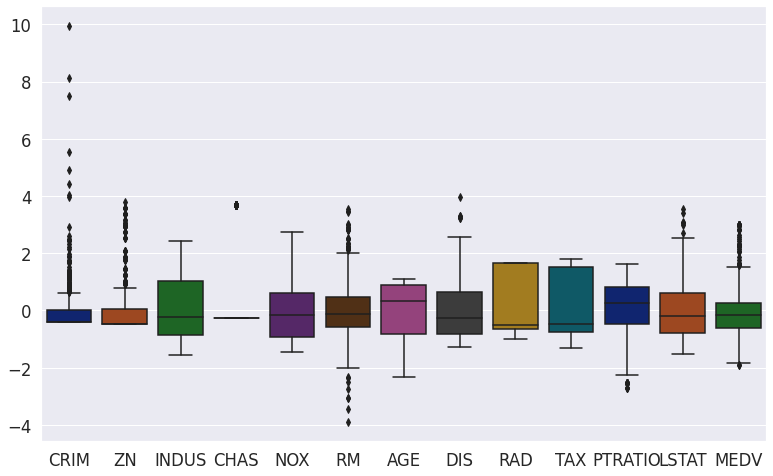

In [8]:
plt.figure(figsize=(13, 8))
sns.set(font_scale=1.5)
sns.boxplot(data=Z_data, palette='dark')

데이터를 입력과 출력으로 분리

In [9]:
print('\n분리 전 데이터 모양: ', Z_data.shape)
X_data = Z_data.drop('MEDV', axis=1)
Y_data = Z_data['MEDV']


분리 전 데이터 모양:  (506, 13)


데이터를 학습용과 평가용으로 분리

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data,
                                                    Y_data,
                                                    test_size=0.3)

print('\n학습용 입력 데이터 모양:', X_train.shape)
print('학습용 출력 데이터 모양:', Y_train.shape)
print('평가용 입력 데이터 모양:', X_test.shape)
print('평가용 출력 데이터 모양:', Y_test.shape)



학습용 입력 데이터 모양: (354, 12)
학습용 출력 데이터 모양: (354,)
평가용 입력 데이터 모양: (152, 12)
평가용 출력 데이터 모양: (152,)


# 3. 인공신경망 구현

In [11]:
# 케라스 DNN 구현
model = Sequential()

# 입력 뉴런 수
input = X_train.shape[1]

# 입력층과 은닉층 1 추가
model.add(Dense(units=MY_HIDDEN,
                input_dim=input,
                activation='relu'))

# 은닉층 2 추가
model.add(Dense(units=MY_HIDDEN,
                activation='relu'))
# 출력층 추가
model.add(Dense(units=1))

print('DNN 요약')
model.summary()

DNN 요약
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1300      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 11,501
Trainable params: 11,501
Non-trainable params: 0
_________________________________________________________________


# 4. 인공신경망 학습

In [12]:
# 최적화 함수와 손실 함수 지정
model.compile(optimizer='Adam',
              loss='mse')

print('\n 학습 시작')
begin = time()

model.fit(x=X_train,
          y=Y_train,
          epochs=MY_EPOCH,
          batch_size=MY_BATCH,
          verbose=1)

end=time()
print('총 합습시간; {:.1f}초'.format(end-begin))


 학습 시작
Epoch 1/70
28/28 [==============================] - 1s 2ms/step - loss: 0.6092
Epoch 2/70
28/28 [==============================] - 0s 2ms/step - loss: 0.1963
Epoch 3/70
28/28 [==============================] - 0s 2ms/step - loss: 0.1581
Epoch 4/70
28/28 [==============================] - 0s 2ms/step - loss: 0.1500
Epoch 5/70
28/28 [==============================] - 0s 2ms/step - loss: 0.0995
Epoch 6/70
28/28 [==============================] - 0s 2ms/step - loss: 0.0907
Epoch 7/70
28/28 [==============================] - 0s 2ms/step - loss: 0.1036
Epoch 8/70
28/28 [==============================] - 0s 2ms/step - loss: 0.1016
Epoch 9/70
28/28 [==============================] - 0s 2ms/step - loss: 0.1161
Epoch 10/70
28/28 [==============================] - 0s 2ms/step - loss: 0.0829
Epoch 11/70
28/28 [==============================] - 0s 2ms/step - loss: 0.0689
Epoch 12/70
28/28 [==============================] - 0s 2ms/step - loss: 0.0766
Epoch 13/70
28/28 [======================

# 5. 인공신경망 평가

In [13]:
# 신경망 평가 및 손실값 계산
loss = model.evaluate(x=X_test,
                      y=Y_test,
                      verbose=1
                      )

print('\nDNN 평균 제곱 오차 (MSE): {:.2f}'.format(loss))

5/5 [==============================] - 0s 2ms/step - loss: 0.1278

DNN 평균 제곱 오차 (MSE): 0.13


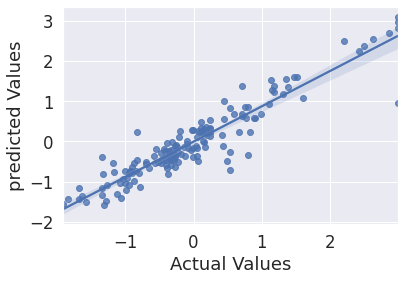

In [14]:
# 신경망 활용 및 산포도 출력
pred = model.predict(x=X_test)
sns.regplot(x=Y_test, y=pred)

plt.xlabel('Actual Values')
plt.ylabel('predicted Values')
plt.show()